# 14-day cumulative number of COVID-19 cases per 100 000

At the end of the page, we provide a detailed description of how the numbers are calculated.

### Compute data

In [1]:
import pandas as pd
pd.set_option("display.max_rows", None)
from oscovida import get_incidence_rates_countries

## Table for all countries

In [2]:
cases_incidence, deaths_incidence = get_incidence_rates_countries()

Downloaded data: last data point 3/11/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv
Downloaded data: last data point 3/11/22 from https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv


In [3]:
cases_incidence

,14-day-sum,population,14-day-incidence-rate
Country,,,
Afghanistan,2890,38928341,7.4
Albania,1411,2877800,49.0
Algeria,685,43851043,1.6
Andorra,795,77265,1028.9
Angola,154,32866268,0.5
Antarctica,0,0,NaN
Antigua and Barbuda,29,97928,29.6
Argentina,79237,45195777,175.3
Armenia,3050,2963234,102.9


## Table sorted by 14-day-incidence

In [4]:
cases_incidence.sort_values(by=['14-day-incidence-rate'], ascending=False)

,14-day-sum,population,14-day-incidence-rate
Country,,,
Winter Olympics 2022,21,0,inf
Brunei,55420,437483,12667.9
Iceland,35160,341250,10303.3
"Korea, South",3374994,51269183,6582.9
New Zealand,276454,4822233,5732.9
Liechtenstein,2118,38137,5553.7
Latvia,99124,1886202,5255.2
Austria,461116,9006400,5119.9
Netherlands,843324,17134873,4921.7


## Tutorial: Detailed calculation for one country

In [5]:
from oscovida import fetch_cases, get_population
import datetime

In [6]:
period = 14 # Days we compute the incidence rate over

In [7]:
cases = fetch_cases() # Get a DataFrame where each row is the country, and columns cumulative case numbers
cases = cases.groupby(cases.index).sum() # Merge the rows for different regions as we want the numbers for an entire country

In [8]:
cases_germany = cases.loc['Germany'][2:] # First 2 entries are lat/lon so we only take the subsequent ones
cases_germany.tail()

3/7/22     16065024.0
3/8/22     16326087.0
3/9/22     16588872.0
3/10/22    16814429.0
3/11/22    17051518.0
Name: Germany, dtype: float64

In [9]:
yesterday = datetime.datetime.now() - datetime.timedelta(days=1)
x_days_ago = yesterday - datetime.timedelta(days=period)

In [10]:
period_mask = (
    (yesterday > pd.to_datetime(cases_germany.index)) &
    (pd.to_datetime(cases_germany.index) > x_days_ago)
) # Mask for dates between today and x days ago

In [11]:
cases_in_period_per_day_germany = cases_germany[period_mask].diff() # Apply the period mask and get the diff to get the daily new cases
cases_in_period_per_day_germany

2/26/22         NaN
2/27/22     47103.0
2/28/22    132801.0
3/1/22      62096.0
3/2/22     199654.0
3/3/22     356864.0
3/4/22     182713.0
3/5/22     116159.0
3/6/22      67466.0
3/7/22     167446.0
3/8/22     261063.0
3/9/22     262785.0
3/10/22    225557.0
3/11/22    237089.0
Name: Germany, dtype: float64

<AxesSubplot:>

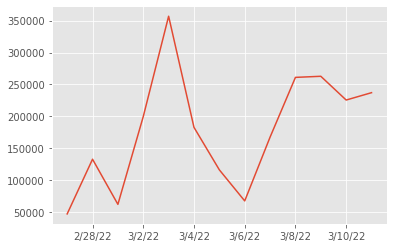

In [12]:
cases_in_period_per_day_germany.plot() # We can easily look at new cases per day

In [13]:
population = get_population().population

In [14]:
population_germany = population.loc['Germany'] # Get the population of Germany
population_germany

83155031.0

In [15]:
incidence_rate_germany = cases_in_period_per_day_germany.sum() / population_germany * 100_000
incidence_rate_germany # By convention this is total cases over period / population * 100_000

2788.5215988915934